In [ ]:
# default_exp metrics

In [ ]:
#hide
%load_ext autoreload
%autoreload 2
%load_ext tensorboard

# metrics

> API details.

In [ ]:
#hide
from nbdev.showdoc import *
from fastcore.test import *

In [ ]:
#export
import torch
from scipy.optimize import linear_sum_assignment

In [ ]:
#export
def bbox_iou(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
    # return the intersection over union value
    return iou

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


label: tensor([ 38,  11, 213, 215])
bbox: tensor([ 40, 111, 176, 193])
IoU: tensor(0.3152)


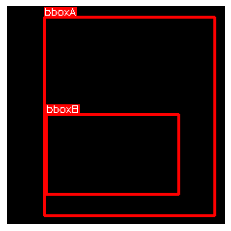

In [ ]:
from detection_nbdev.utils import random_bbox, visualize
import numpy as np

bboxA = random_bbox()
bboxB = random_bbox()
iou = bbox_iou(bboxA, bboxB)

print('label:', bboxA)
print('bbox:', bboxB)
print('IoU:', iou)

visualize(
    np.zeros((224,224,3)),
    [bboxA, bboxB],
    [0, 1],
    {0:'bboxA', 1:'bboxB'},
)

In [ ]:
#export
def hungarian_loss(boxesA, boxesB, loss_func=bbox_iou, maximize=True):
    n = max(len(boxesA), len(boxesB))
    cost_matrix = torch.zeros((n,n))
            
    for i, boxA in enumerate(boxesA):
        for j, boxB in enumerate(boxesB):
            if boxA is None or boxB is None:
                cost_matrix[i,j] = int(not maximize)
            else:
                cost_matrix[i, j] = bbox_iou(boxA, boxB)
    
    row_ind, col_ind = linear_sum_assignment(cost_matrix, maximize=maximize)
    loss = cost_matrix[row_ind, col_ind].mean()
    if loss.isnan():
        return 0
    else:
        return loss

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(False)
Hungarian IoU Loss: tensor(0.1669)


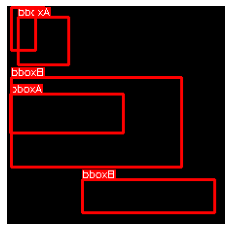

In [ ]:
bboxesA = [random_bbox() for _ in range(2)]
bboxesB = [random_bbox() for _ in range(3)]

loss_iou = hungarian_loss(bboxesA, bboxesB, bbox_iou, maximize=True)

print('Hungarian IoU Loss:', loss_iou)
visualize(
    np.zeros((224,224,3)),
    bboxesA + bboxesB,
    [0]*len(bboxesA) +  [1]*len(bboxesB),
    {0:'bboxA', 1:'bboxB'},
)